In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv(r'..\resources\spotify\dataset.csv')

In [4]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## Column Specifications

| Column             | Type              | Description |
|--------------------|-------------------|-------------|
| track_id          | String           | Unique Spotify ID for the track (e.g., "spotify:track:2takcwOaAZWiXQijPHIx7B"). |
| artists           | String           | Names of performing artists, separated by semicolons for multiples. |
| album_name        | String           | Name of the album containing the track. |
| track_name        | String           | Title of the track. |
| popularity        | Integer (0-100)  | Score where higher values indicate greater popularity based on plays and recency. |
| duration_ms       | Integer          | Track length in milliseconds. |
| explicit          | Boolean          | Indicates if the track contains explicit lyrics. |
| danceability      | Float (0.0-1.0)  | Suitability for dancing based on tempo, rhythm stability, beat strength, and regularity (0.0 least, 1.0 most). |
| energy            | Float (0.0-1.0)  | Perceived intensity and activity (0.0 calm, 1.0 high-energy). |
| key               | Integer (-1 to 11)| Numeric key (0=C, 1=C♯/D♭); -1 if no key detected. |
| loudness          | Float            | Overall loudness in decibels (typically -60 to 0). |
| mode              | Integer (0-1)    | Modality (0=major, 1=minor). |
| speechiness       | Float (0.0-1.0)  | Presence of spoken words (0.0=music, 1.0=spoken like podcast). |
| acousticness      | Float (0.0-1.0)  | Confidence that the track is acoustic (0.0=electric, 1.0=acoustic). |
| instrumentalness  | Float (0.0-1.0)  | Likelihood of no vocals (0.0=vocalic, 1.0=instrumental). |
| liveness          | Float (0.0-1.0)  | Detection of live audience (higher for live recordings). |
| valence           | Float (0.0-1.0)  | Musical positiveness (0.0=sad/angry, 1.0=happy/cheerful). |
| tempo             | Float            | Estimated beats per minute (BPM). |
| time_signature    | Integer          | An estimated overall time signature (e.g., 4/4 as 4). |
| track_genre       | String           | Assigned genre label (e.g., from datasets covering 125 genres). |

In [6]:
df_null = df[df['track_name'].isna()]
df_null

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [7]:
df = df.rename(columns={'Unnamed: 0': 'song_no'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   song_no           114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [9]:
df = df.fillna('Unknown')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   song_no           114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           114000 non-null  object 
 3   album_name        114000 non-null  object 
 4   track_name        114000 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [11]:
df['popularity'].nunique()

101

In [12]:
df['popularity'].value_counts(normalize=True).sort_values(ascending=False)

popularity
0      0.140526
22     0.020649
21     0.020561
44     0.020070
1      0.018772
         ...   
98     0.000061
94     0.000061
95     0.000044
100    0.000018
99     0.000009
Name: proportion, Length: 101, dtype: float64

In [13]:
df_numeric = df.select_dtypes(include="number")
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   song_no           114000 non-null  int64  
 1   popularity        114000 non-null  int64  
 2   duration_ms       114000 non-null  int64  
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 13.0 MB


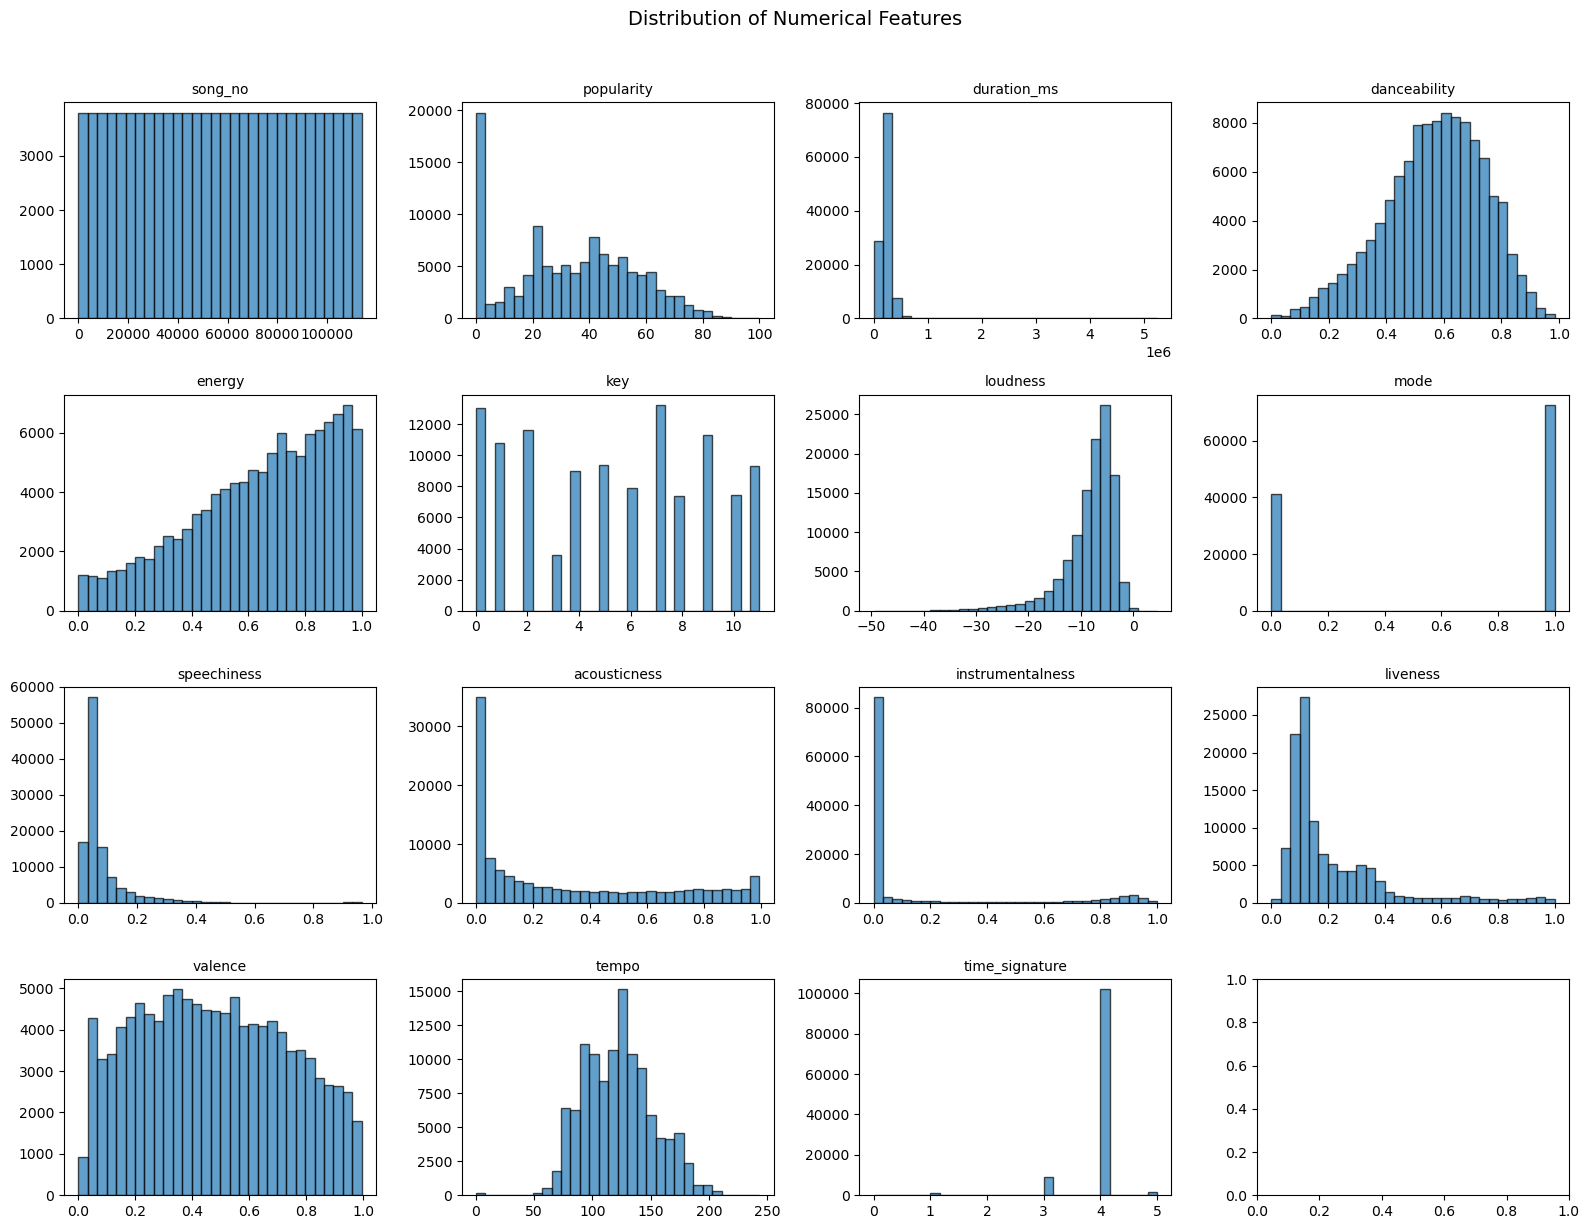

In [14]:
# Distribution of numerical features
fig, axes = plt.subplots(4, 4, figsize=(16, 12))

axes = axes.ravel()

for idx, col in enumerate(df_numeric.columns[:15]):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [15]:
# Select only numeric columns
X_num = df.select_dtypes(include=np.number)

# Compute correlation matrix (default method='pearson')
corr_matrix = X_num.corr().round(2)

# Display the matrix
print(corr_matrix)

                  song_no  popularity  duration_ms  danceability  energy  \
song_no              1.00        0.03        -0.03          0.00   -0.06   
popularity           0.03        1.00        -0.01          0.04    0.00   
duration_ms         -0.03       -0.01         1.00         -0.07    0.06   
danceability         0.00        0.04        -0.07          1.00    0.13   
energy              -0.06        0.00         0.06          0.13    1.00   
key                 -0.01       -0.00         0.01          0.04    0.05   
loudness            -0.03        0.05        -0.00          0.26    0.76   
mode                 0.01       -0.01        -0.04         -0.07   -0.08   
speechiness         -0.08       -0.04        -0.06          0.11    0.14   
acousticness         0.08       -0.03        -0.10         -0.17   -0.73   
instrumentalness    -0.07       -0.10         0.12         -0.19   -0.18   
liveness             0.03       -0.01         0.01         -0.13    0.18   
valence     

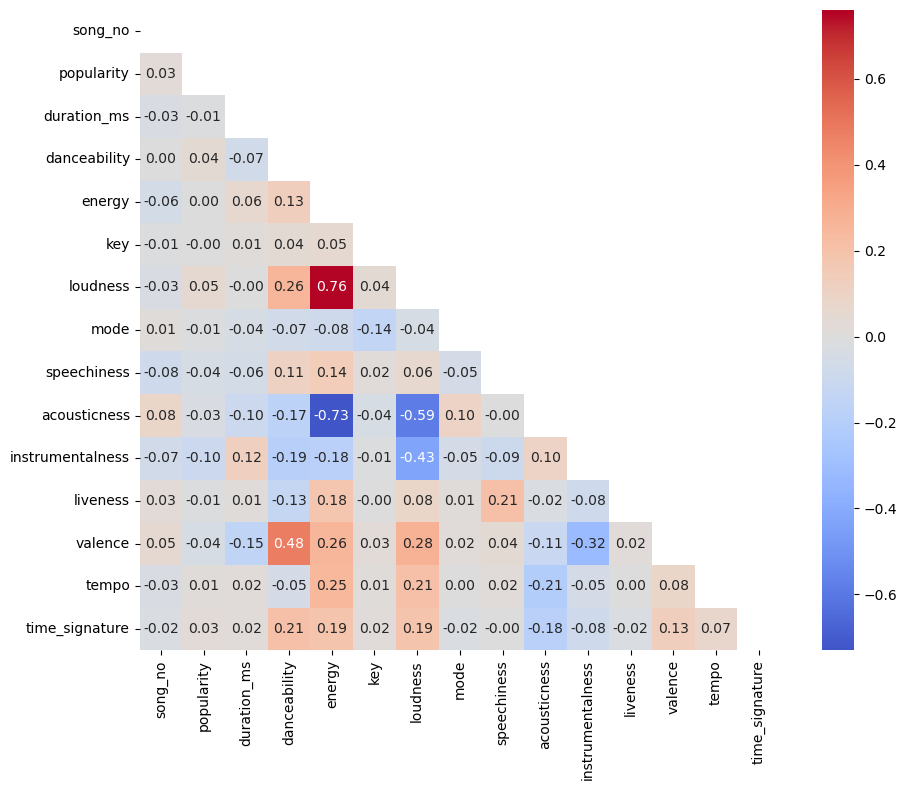

In [16]:
# Assuming corr_matrix from before
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Upper triangle mask

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,                          # Hides upper triangle
    cmap="coolwarm",                    # Red-blue diverging colormap
    center=0,                           # Centers white at 0 correlation
    square=True,                        # Square cells
    annot=True,                         # Show values
    fmt=".2f"                           # 2 decimal places
)
plt.tight_layout()
plt.show()

In [17]:
# For Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [18]:
X_reg = X_num.drop('energy', axis=1)
y_reg = X_num['energy']   

In [19]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [20]:
print(f"Training on {len(X_train_reg)} songs")
print(f"Testing on {len(X_test_reg)} songs")

Training on 91200 songs
Testing on 22800 songs


In [21]:
# Train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = reg_model.predict(X_test_reg)

In [22]:
y_pred_reg

array([0.72035572, 0.97465435, 0.48943332, ..., 0.50555155, 0.80005466,
       0.69575408])

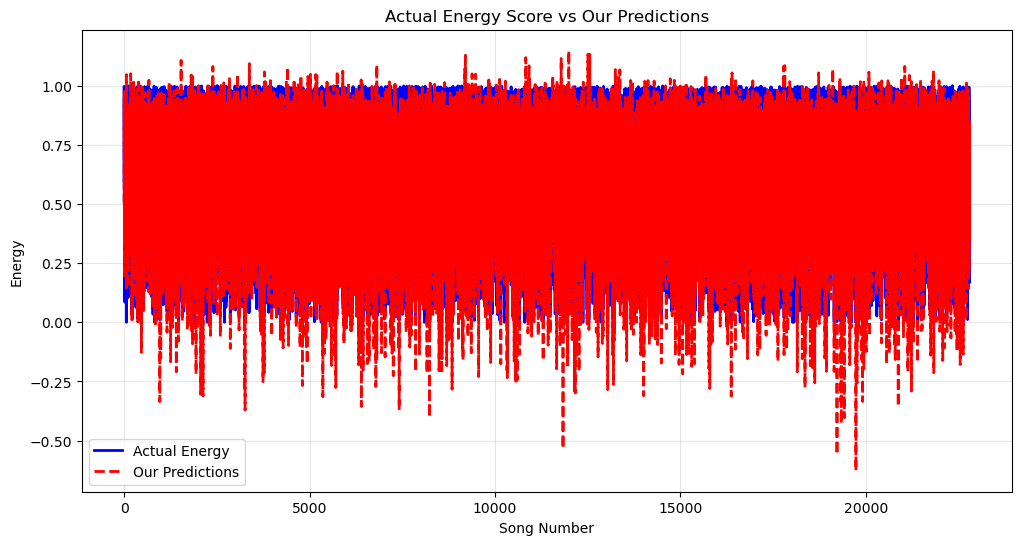

In [23]:
# Simple line plot - Actual vs Predicted
plt.figure(figsize=(12, 6))

# Plot both lines
x_axis = range(len(y_test_reg))
plt.plot(x_axis, y_test_reg.values, 'b-', label='Actual Energy', linewidth=2)
plt.plot(x_axis, y_pred_reg, 'r--', label='Our Predictions', linewidth=2)

plt.xlabel('Song Number')
plt.ylabel('Energy')
plt.title('Actual Energy Score vs Our Predictions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [24]:
# Calculate metrics
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("REGRESSION METRICS EXPLAINED:")
print("=" * 50)
print()
print("Mean Absolute Error (MAE)")
print(f"   Your MAE: Energy {mae:,.0f}")
print("   What it means: On average, our predictions are off by this much")
print("   Think of it as: The typical mistake we make")
print("   Goal: Lower is better!")
print()
print("R² Score (R-squared)")
print(f"   Your R²: {r2:.1%}")
print("   What it means: How much of the price variation we can explain")
print("   Think of it as: Our model's grade out of 100%")
print("   Goal: Higher is better (100% = perfect, 0% = terrible)")
print()
print("Quick Guide:")
print("   R² > 80% = Great!")
print("   R² 70-80% = Good")
print("   R² 60-70% = OK")
print("   R² < 60% = Needs improvement")

REGRESSION METRICS EXPLAINED:

Mean Absolute Error (MAE)
   Your MAE: Energy 0
   What it means: On average, our predictions are off by this much
   Think of it as: The typical mistake we make
   Goal: Lower is better!

R² Score (R-squared)
   Your R²: 76.5%
   What it means: How much of the price variation we can explain
   Think of it as: Our model's grade out of 100%
   Goal: Higher is better (100% = perfect, 0% = terrible)

Quick Guide:
   R² > 80% = Great!
   R² 70-80% = Good
   R² 60-70% = OK
   R² < 60% = Needs improvement


In [25]:
df_objects = df.select_dtypes(include="object")
df_objects

,track_id,artists,album_name,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic
...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,world-music


In [26]:
for column in df.columns:
    print(f"column: {column}", df[column].unique())

column: song_no [     0      1      2 ... 113997 113998 113999]
column: track_id ['5SuOikwiRyPMVoIQDJUgSV' '4qPNDBW1i3p13qLCt0Ki3A'
 '1iJBSr7s7jYXzM8EGcbK5b' ... '6x8ZfSoqDjuNa5SVP5QjvX'
 '2e6sXL2bYv4bSz6VTdnfLs' '2hETkH7cOfqmz3LqZDHZf5']
column: artists ['Gen Hoshino' 'Ben Woodward' 'Ingrid Michaelson;ZAYN' ...
 'Cuencos Tibetanos Sonidos Relajantes'
 'Bryan & Katie Torwalt;Brock Human' 'Jesus Culture']
column: album_name ['Comedy' 'Ghost (Acoustic)' 'To Begin Again' ...
 '#20 Sueños Vividos - Música Intrumental Suave 2018 para Dormir Bien y Relajarse Profundamente'
 'Frecuencias Álmicas en 432hz (Solo Piano)' 'Revelation Songs']
column: track_name ['Comedy' 'Ghost - Acoustic' 'To Begin Again' ... 'Water Into Light'
 'Miss Perfumado' 'Barbincor']
column: popularity [ 73  55  57  71  82  58  74  80  56  69  52  62  54  68  67  75  63  70
   0   1  46  61  60  51  66  64  65  44  45  50  59  49  53  47  43  42
  20  22  35  19  24  18  23  40  38  41  30  37  39  48  36  34  26  32
  33

In [27]:
artists_list = df['artists'].unique().tolist()
artists_list

['Gen Hoshino',
 'Ben Woodward',
 'Ingrid Michaelson;ZAYN',
 'Kina Grannis',
 'Chord Overstreet',
 'Tyrone Wells',
 'A Great Big World;Christina Aguilera',
 'Jason Mraz',
 'Jason Mraz;Colbie Caillat',
 'Ross Copperman',
 'Zack Tabudlo',
 'Dan Berk',
 'Anna Hamilton',
 'Chord Overstreet;Deepend',
 'Landon Pigg',
 'Andrew Foy;Renee Foy',
 'Boyce Avenue;Bea Miller',
 'Boyce Avenue;Jennel Garcia',
 'Brandi Carlile;Sam Smith',
 'KT Tunstall',
 'Brandi Carlile',
 'Eddie Vedder',
 'Brandi Carlile;Lucius',
 'Highland Peak',
 'Motohiro Hata',
 'Andrew Belle',
 'Ron Pope',
 'Adam Christopher',
 'Aron Wright',
 'Sara Bareilles',
 'Kurt Cobain',
 'Tim Halperin',
 'Canyon City',
 'Aaron Espe',
 'Tyler Ward',
 'Five For Fighting',
 'Bailey Jehl',
 'Ingrid Michaelson',
 'A Great Big World',
 'Eddie Vedder;Nusrat Fateh Ali Khan',
 'Drew Holcomb & The Neighbors',
 'Gabrielle Aplin',
 'The Civil Wars',
 'Callum J Wright',
 'Boyce Avenue;Fifth Harmony',
 'Boyce Avenue',
 'Gabrielle Aplin;JP Cooper',
 'Mo

In [28]:
unique_semi_artists = df[df['artists'].str.contains(';', na=False)]['artists'].unique().tolist()
unique_semi_artists

['Ingrid Michaelson;ZAYN',
 'A Great Big World;Christina Aguilera',
 'Jason Mraz;Colbie Caillat',
 'Chord Overstreet;Deepend',
 'Andrew Foy;Renee Foy',
 'Boyce Avenue;Bea Miller',
 'Boyce Avenue;Jennel Garcia',
 'Brandi Carlile;Sam Smith',
 'Brandi Carlile;Lucius',
 'Eddie Vedder;Nusrat Fateh Ali Khan',
 'Boyce Avenue;Fifth Harmony',
 'Gabrielle Aplin;JP Cooper',
 'Ray LaMontagne;Sierra Ferrell',
 'Susie Suh;Robot Koch',
 'Tyler Ward;Lindsey Stirling;Kina Grannis',
 'Eden Elf;Ren Avel',
 'Boyce Avenue;Rachel Grae',
 'Zack Tabudlo;Yonnyboii',
 'Tyler Ward;Karis;Ray Lorraine',
 'Agustín Amigó;Nylonwings',
 'Boyce Avenue;Connie Talbot',
 'Caleb Santos;Viva Music Publishing Inc.',
 'The Weepies;Deb Talan;Steve Tannen',
 "Keb' Mo';Gerald Albright",
 'Todd Carey;Ariza;Chuck Leavell',
 'Zack Tabudlo;Billkin',
 'Donovan Woods;Tenille Townes',
 'Boyce Avenue;Megan Nicole',
 'Jason Mraz;Meghan Trainor',
 'Boyce Avenue;Emma Heesters',
 'Kina Grannis;Imaginary Future',
 'Allman Brown;Liz Lawrence'

In [29]:
single_artists = df[~df['artists'].str.contains(';', na=False)]['artists'].unique().tolist()
single_artists

['Gen Hoshino',
 'Ben Woodward',
 'Kina Grannis',
 'Chord Overstreet',
 'Tyrone Wells',
 'Jason Mraz',
 'Ross Copperman',
 'Zack Tabudlo',
 'Dan Berk',
 'Anna Hamilton',
 'Landon Pigg',
 'KT Tunstall',
 'Brandi Carlile',
 'Eddie Vedder',
 'Highland Peak',
 'Motohiro Hata',
 'Andrew Belle',
 'Ron Pope',
 'Adam Christopher',
 'Aron Wright',
 'Sara Bareilles',
 'Kurt Cobain',
 'Tim Halperin',
 'Canyon City',
 'Aaron Espe',
 'Tyler Ward',
 'Five For Fighting',
 'Bailey Jehl',
 'Ingrid Michaelson',
 'A Great Big World',
 'Drew Holcomb & The Neighbors',
 'Gabrielle Aplin',
 'The Civil Wars',
 'Callum J Wright',
 'Boyce Avenue',
 'Mone Kamishiraishi',
 'John Adams',
 'Kitri',
 'Augustana',
 'Matthew Perryman Jones',
 'Meg Birch',
 'Catherine Feeny',
 'Joshua Hyslop',
 'JJ Heller',
 'Howie Day',
 'Ben Rector',
 'Matt Nathanson',
 'Rachael Yamagata',
 'Parachute',
 'Cary Brothers',
 'The Mayries',
 'Joseph Sullinger',
 'Tobey Rosen',
 'Aqualung',
 'Amy Stroup',
 'Priscilla Ahn',
 'Jon Bryant',


In [30]:
multi_rows = df[df['artists'].str.contains(';', na=False)]
multi_artists_flat = (
    multi_rows['artists'].str.split(';')
    .explode().str.strip().unique().tolist()
)
multi_artists_flat

['Ingrid Michaelson',
 'ZAYN',
 'A Great Big World',
 'Christina Aguilera',
 'Jason Mraz',
 'Colbie Caillat',
 'Chord Overstreet',
 'Deepend',
 'Andrew Foy',
 'Renee Foy',
 'Boyce Avenue',
 'Bea Miller',
 'Jennel Garcia',
 'Brandi Carlile',
 'Sam Smith',
 'Lucius',
 'Eddie Vedder',
 'Nusrat Fateh Ali Khan',
 'Fifth Harmony',
 'Gabrielle Aplin',
 'JP Cooper',
 'Ray LaMontagne',
 'Sierra Ferrell',
 'Susie Suh',
 'Robot Koch',
 'Tyler Ward',
 'Lindsey Stirling',
 'Kina Grannis',
 'Eden Elf',
 'Ren Avel',
 'Rachel Grae',
 'Zack Tabudlo',
 'Yonnyboii',
 'Karis',
 'Ray Lorraine',
 'Agustín Amigó',
 'Nylonwings',
 'Connie Talbot',
 'Caleb Santos',
 'Viva Music Publishing Inc.',
 'The Weepies',
 'Deb Talan',
 'Steve Tannen',
 "Keb' Mo'",
 'Gerald Albright',
 'Todd Carey',
 'Ariza',
 'Chuck Leavell',
 'Billkin',
 'Donovan Woods',
 'Tenille Townes',
 'Megan Nicole',
 'Meghan Trainor',
 'Emma Heesters',
 'Imaginary Future',
 'Allman Brown',
 'Liz Lawrence',
 'Sarah Hyland',
 "Mother's Daughter",


In [31]:
common_artists = np.intersect1d(single_artists, multi_artists_flat).tolist()
common_artists

['$affie',
 '(G)I-DLE',
 '(Hed) P.E.',
 '-M-',
 '10-FEET',
 '100 Blaze',
 '12th Planet',
 '1986zig',
 '1991',
 '2 Blyga Läppar',
 '2 Brothers On The 4th Floor',
 '22Gz',
 '2Pac',
 '2gaudy',
 '3 Doors Down',
 '3 Steps Ahead',
 '3030',
 '31 Minutos',
 '347aidan',
 '3FORCE',
 '3OH!3',
 '44phantom',
 '450',
 '4ever Falling',
 '4hero',
 '5 Seconds of Summer',
 '5 a Seco',
 '50 Cent',
 '6 Dogs',
 '6091',
 '6ix9ine',
 '6t6',
 '7 Minutoz',
 '7ru7h',
 '916frosty',
 'A Day To Remember',
 'A Great Big World',
 'A Mose',
 'A Si',
 'A*S*Y*S',
 'A-Lusion',
 'A-Mei Chang',
 'A. G. Cook',
 'A.B.I',
 'A.CHAL',
 'A.M.C',
 'A.M.R',
 'A.N.I.M.A.L.',
 'A.R. Rahman',
 'A.Skillz',
 'A1 x J1',
 'AGA',
 'AJ Mitchell',
 'AJR',
 'AL-90',
 'ALEX',
 'ALEXANDRE APOSAN',
 'ALMAR',
 'ALPHA 9',
 'AMAN',
 'AMARIA BB',
 'ANAVITÓRIA',
 'ANDY SVGE',
 'ANNA',
 'AO Cubo',
 'AP Dhillon',
 'ARTBAT',
 'ARTY',
 'ATB',
 'ATLiens',
 'ATTLAS',
 'AURORA',
 'Aamir Khan',
 'Aaron Kwok',
 'Aaron Smith',
 'Aaron Tveit',
 'Aaryan Shah',

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   song_no           114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           114000 non-null  object 
 3   album_name        114000 non-null  object 
 4   track_name        114000 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [33]:
df.shape

(114000, 21)

In [34]:
genre_list = df['track_genre'].unique().tolist()
genre_list

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie-pop',
 'indie',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop-film',
 'pop',
 'power-pop',
 'progressive

In [35]:
album_list = df['album_name'].unique().tolist()
album_list

['Comedy',
 'Ghost (Acoustic)',
 'To Begin Again',
 'Crazy Rich Asians (Original Motion Picture Soundtrack)',
 'Hold On',
 'Days I Will Remember',
 'Is There Anybody Out There?',
 'We Sing. We Dance. We Steal Things.',
 'Hunger',
 'Episode',
 'Love Is a Four Letter Word',
 'Solo',
 'Bad Liar',
 'Hold On (Remix)',
 'The Boy Who Never',
 'ily (i love you baby)',
 'At My Worst',
 'Cover Sessions, Vol. 4',
 'Cover Sessions, Vol. 3',
 'Is There Anybody Out There? - Track by Track Commentary',
 'Coffee Moment',
 'Human - Best Adult Pop Tunes',
 'Mellow Adult Pop',
 'Holly Jolly Christmas',
 'Feeling Good - Adult Pop Favorites',
 'Christmas Time',
 'Perfect Christmas Hits',
 'Merry Christmas',
 'Christmas Music - Holiday Hits',
 'Christmas Country Songs 2022',
 "Mellow Bars R'n'B",
 'Chill Christmas Dinner',
 'rainy day indie',
 'sadsadchristmas',
 'Mega Hits Autumn/Fall 2022',
 'Country Car Hits',
 'Country Road Songs',
 'Finest Country',
 'Easy Country',
 'Cozy Country',
 'Good Times Countr

In [36]:
track_list = df['track_name'].unique().tolist()
track_list

['Comedy',
 'Ghost - Acoustic',
 'To Begin Again',
 "Can't Help Falling In Love",
 'Hold On',
 'Days I Will Remember',
 'Say Something',
 "I'm Yours",
 'Lucky',
 'Hunger',
 'Give Me Your Forever',
 "I Won't Give Up",
 'Solo',
 'Bad Liar',
 'Hold On - Remix',
 'Falling in Love at a Coffee Shop',
 'ily (i love you baby)',
 'At My Worst',
 'Photograph',
 'Demons',
 '93 Million Miles',
 'Unlonely',
 'Bella Luna',
 'Winter Wonderland',
 'If It Kills Me',
 'All I Want For Christmas Is A Real Good Tan',
 'Party of One',
 'Lonely This Christmas',
 'Throwing Good After Bad',
 'This Time Tomorrow',
 'The Haves',
 "When You're Wrong",
 'You and Me on the Rock',
 'Speak Your Mind (From the Netflix Series "We The People")',
 'Trampoline - Acoustic',
 '透明だった世界',
 'Pieces',
 'A Drop in the Ocean',
 'So Far Away - Acoustic',
 'The Enemy',
 'Build It Better',
 'Sleepwalking in the Rain',
 'Gravity',
 "What's Left of You",
 'Pano',
 "Sky's Still Blue",
 'And I Love Her',
 "We Can't Stop",
 'Always Be My

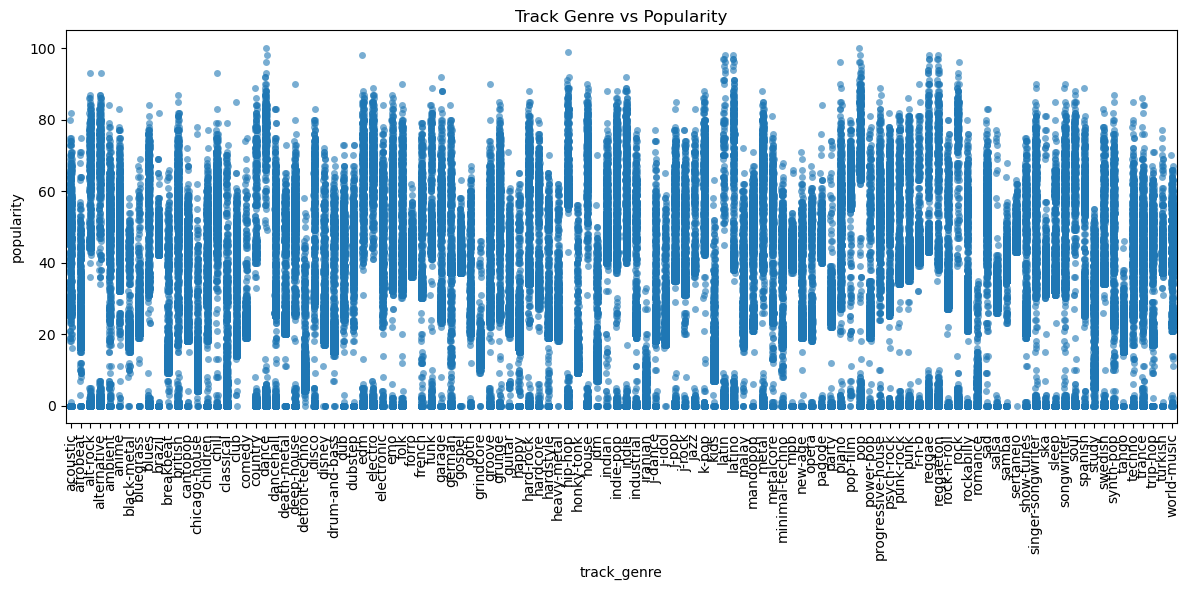

In [37]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='track_genre', y='popularity', alpha=0.6)
plt.xticks(rotation=90)
plt.title('Track Genre vs Popularity')
plt.tight_layout()
plt.show()

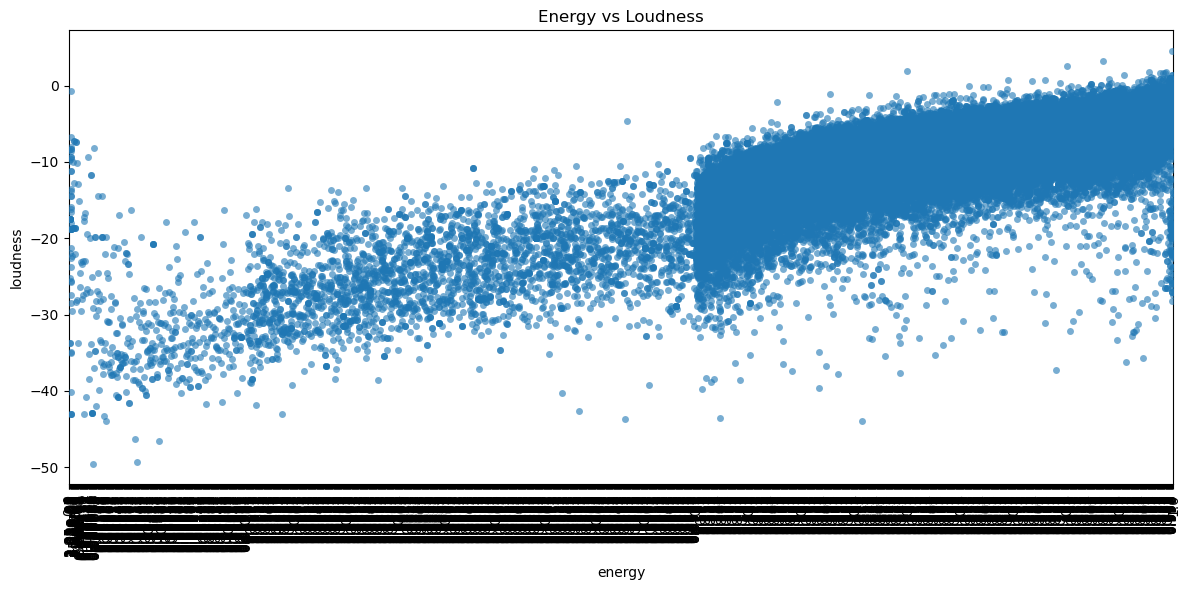

In [38]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='energy', y='loudness', alpha=0.6)
plt.xticks(rotation=90)
plt.title('Energy vs Loudness')
plt.tight_layout()
plt.show()

In [39]:
# Your DataFrame 'df' with 'artists' column
df['num_semis'] = df['artists'].str.count(';')
max_semis = df['num_semis'].max()
df = df.drop('num_semis', axis=1)

for i in range(1, max_semis + 2):
    df[f'artist_{i}'] = df['artists'].str.split(';').str[i-1].str.strip().fillna('None')

In [40]:
df['num_artists'] = df['artists'].str.split(';').str.len()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 60 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   song_no           114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           114000 non-null  object 
 3   album_name        114000 non-null  object 
 4   track_name        114000 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

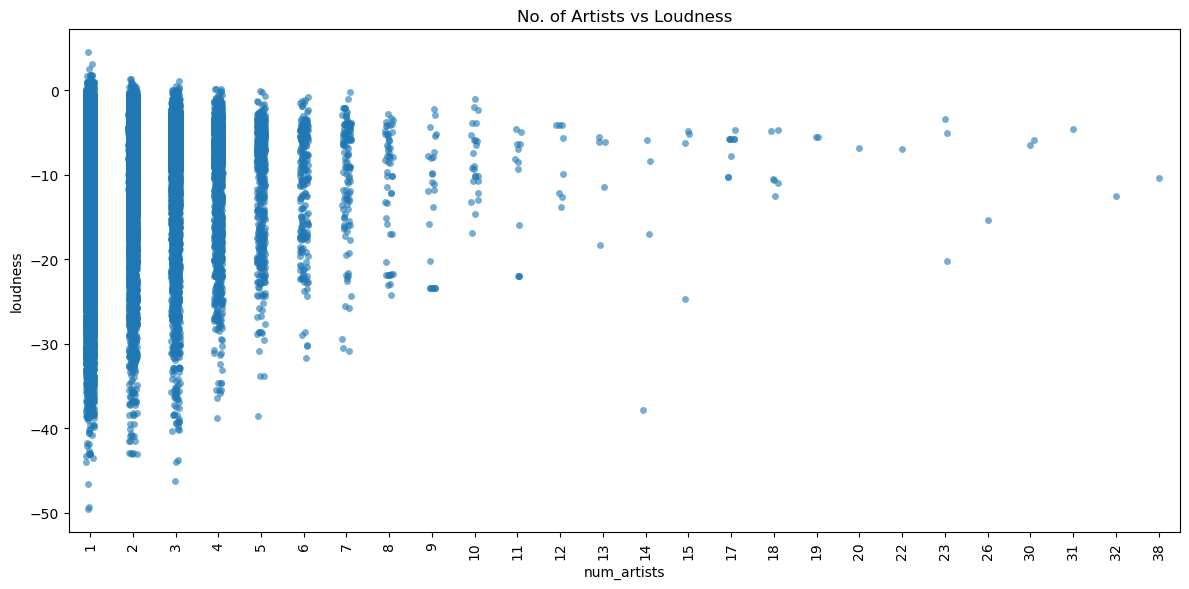

In [42]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='num_artists', y='loudness', alpha=0.6)
plt.xticks(rotation=90)
plt.title('No. of Artists vs Loudness')
plt.tight_layout()
plt.show()

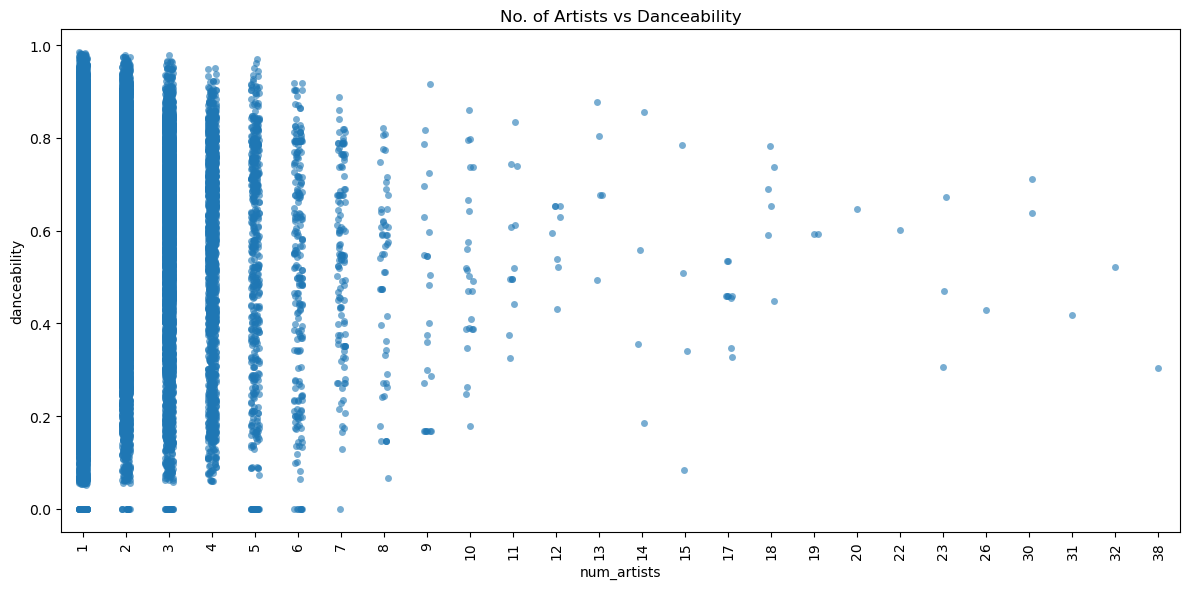

In [43]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='num_artists', y='danceability', alpha=0.6)
plt.xticks(rotation=90)
plt.title('No. of Artists vs Danceability')
plt.tight_layout()
plt.show()

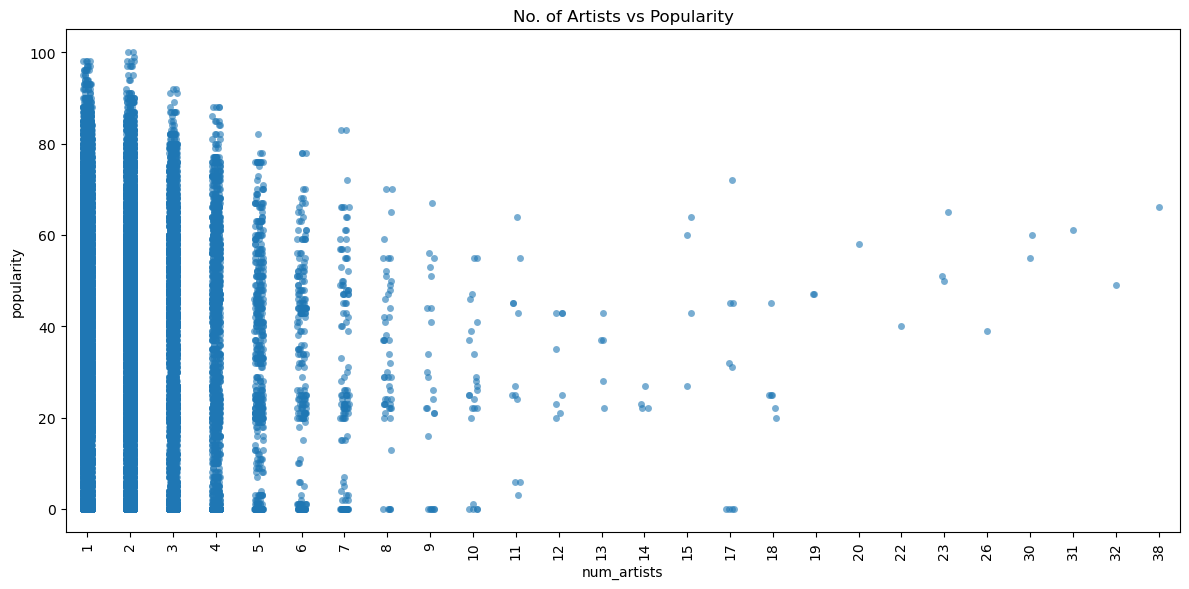

In [44]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='num_artists', y='popularity', alpha=0.6)
plt.xticks(rotation=90)
plt.title('No. of Artists vs Popularity')
plt.tight_layout()
plt.show()

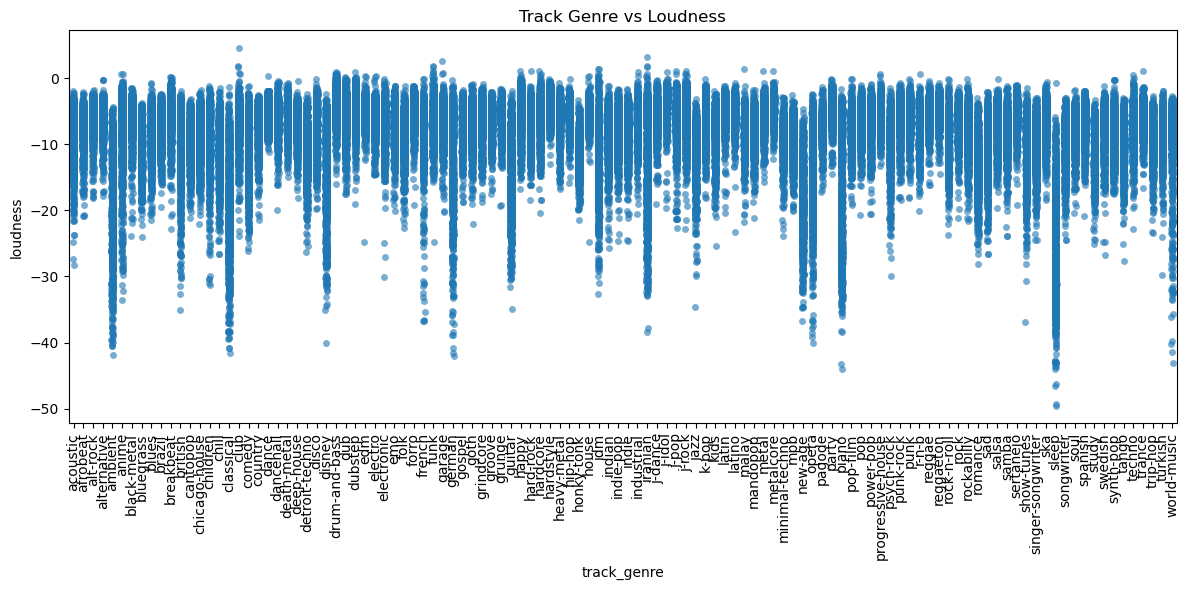

In [45]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='track_genre', y='loudness', alpha=0.6)
plt.xticks(rotation=90)
plt.title('Track Genre vs Loudness')
plt.tight_layout()
plt.show()

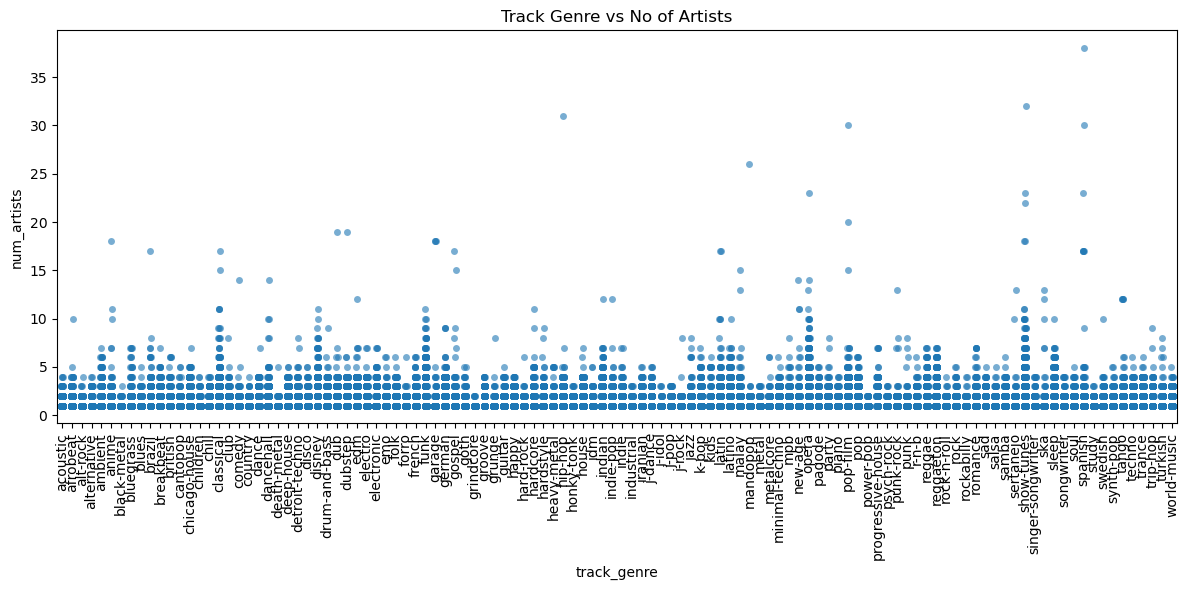

In [46]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='track_genre', y='num_artists', alpha=0.6)
plt.xticks(rotation=90)
plt.title('Track Genre vs No of Artists')
plt.tight_layout()
plt.show()

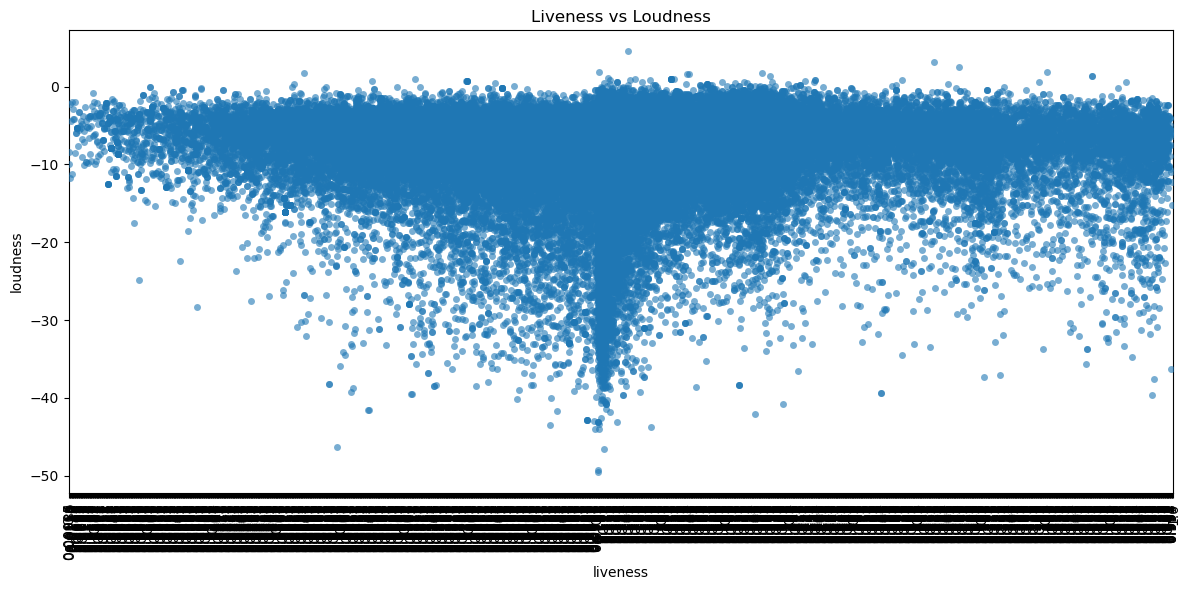

In [48]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='liveness', y='loudness', alpha=0.6)
plt.xticks(rotation=90)
plt.title('Liveness vs Loudness')
plt.tight_layout()
plt.show()

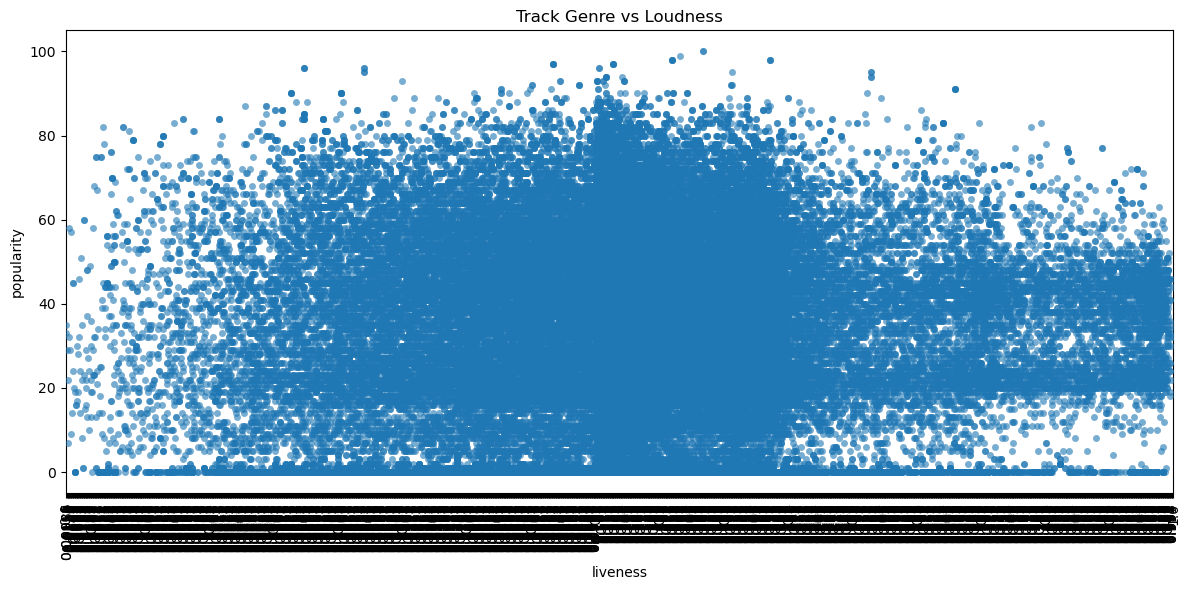

In [49]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='liveness', y='popularity', alpha=0.6)
plt.xticks(rotation=90)
plt.title('Track Genre vs Loudness')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('artist_split.csv',index=False)